# Comparing the heights of plants grown from cross-fertilised and self-fertilised seeds  # noqa:  E501

## Summary

### Question of interest

Are plants grown from cross-fertilised seeds on average taller than
plants grown from self-fertilised seeds?

### Data

- Data consists of 15 paired samples of the heights of plants grown
  from cross-fertilised and self-fertilised seeds
- Data fields:
  - **id** `int` : pair the observation belongs to
  - **type** `int` : how the plant was fertilised, either `cross` or
    `self`
  - **size** `int` : height of plant (1/8 inch)

### Method

- Data plotted as comparative boxplots
- Given data is biological, reasonable to suppose that it can modelled
  normally
  - Normality of samples checked using a normal probability plot
- Difference between paired observations calculated
- Differences plotted as a boxplot
- Mean and 95% **t**-interval returned both samples
- Mean difference and 95% **t**-interval of the mean difference
  returned
- Performed paired **t**-test: mean difference in plant height equal to
  zero

### Results

- None of the visualisations show the assumption that both samples are 
  normally distributed is inappropriate
  - Frequency histogram shows both samples are unimodal and symmetric
  - Probability plots show the data to closely follow a fitted straight
- Description of samples:
  - `Cross(size=15, mean=161.533333, tconfint_mean=(145.509354, 177.557313))`
  - `Self(size=15, mean=140.600000, tconfint_mean=(131.510557, 149.689443))`
- Description of difference between the samples
  - `Difference(size=15, mean=20.933333, tconfint_mean=(0.031193, 41.835473))`
- Paired **t**-test result
  - `ResultSummary(tstat=11.924823, pval=0.000000, dof=152)`

### Discussion

- Null hypothesis is rejected with **p**-value < 0.050
- Moderate evidence again the null hypothesis that the mean difference
  in heights between paired cross- and self-fertilised plants is equal
  to zero
- Given test statistic **t**>0, moderate evidence to support the the
  mean height of plants grown from cross-fertilisation are taller than
  plants grown from self-fertilised seeds

### Reference

m248.b.

-----

## Results

### Setup the notebook

In [1]:
# import packages and modules
from scipy import stats
import pandas as pd
import statsmodels.stats.weightstats as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

In [2]:
# set seaborn theme
sns.set_theme()

In [3]:
# import custom modules not in root
sys.path[0] = "..\\"  # update path
from src import load, describe, summarise  # noqa: E402

### Import the data

In [4]:
# get data
darwin: pd.DataFrame = load.Data.get("darwin_plants_height")

In [5]:
darwin.head()

,id,type,size
0,1,cross,188
1,2,cross,96
2,3,cross,168
3,4,cross,176
4,5,cross,153


In [6]:
# check dtypes
darwin.dtypes

id       int64
type    object
size     int64
dtype: object

In [7]:
# get samples
darwin.sort_values(by=["id", "type"], inplace=True)
cross: np.array = darwin.query('type == "cross"')["size"].to_numpy()
self_: np.array = darwin.query('type == "self"')["size"].to_numpy()

### Visualise the samples

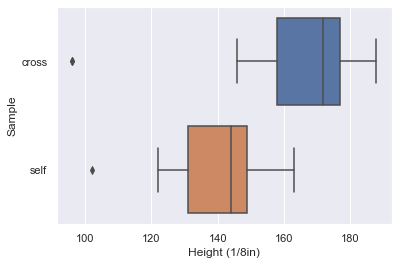

In [8]:
# boxplot of samples
ax = sns.boxplot(data=darwin, x="size", y="type")
ax.set(xlabel="Height (1/8in)", ylabel="Sample")
plt.show()

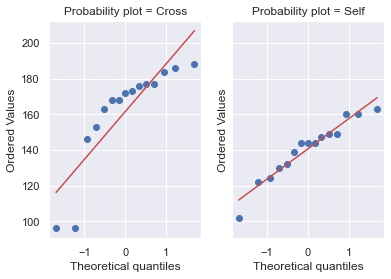

In [9]:
# probability plot of samples
f, axs = plt.subplots(ncols=2, sharey=True)
stats.probplot(x=cross, plot=axs[0])
axs[0].set(title="Probability plot = Cross")
stats.probplot(x=self_, plot=axs[1])
axs[1].set(title="Probability plot = Self")
plt.show()

### Start analysis

In [10]:
# get difference
diff: np.array = cross - self_

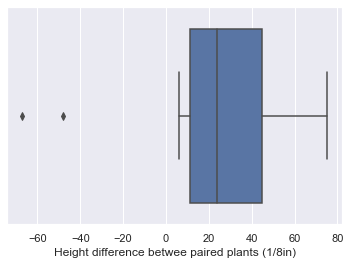

In [11]:
# boxplot of difference
ax = sns.boxplot(x=diff)
ax.set(xlabel="Height difference betwee paired plants (1/8in)")
plt.show()

In [12]:
# initialise DescrStatsW objects
dsw_cross: sm.DescrStatsW = sm.DescrStatsW(data=cross)
dsw_self: sm.DescrStatsW = sm.DescrStatsW(data=self_)
dsw_diff: sm.DescrStatsW = sm.DescrStatsW(data=diff)

In [13]:
describe.TSample(
    "Cross", dsw_cross.nobs, dsw_cross.mean, dsw_cross.tconfint_mean())

Cross(size=15, mean=161.533333, tconfint_mean=(145.509354, 177.557313))

In [14]:
describe.TSample(
    "Self", dsw_self.nobs, dsw_self.mean, dsw_self.tconfint_mean())

Self(size=15, mean=140.600000, tconfint_mean=(131.510557, 149.689443))

In [15]:
describe.TSample(
    "Diff", dsw_diff.nobs, dsw_diff.mean, dsw_diff.tconfint_mean())

Diff(size=15, mean=20.933333, tconfint_mean=(0.031193, 41.835473))

In [16]:
# run the test
tstat, pval, dof = dsw_diff.ttest_mean()
summarise.TTest(tstat, pval, dof)

ResultSummary(tstat=2.147987, pval=0.049703, dof=14)